## dataset from kaggle : https://www.kaggle.com/code/karnikakapoor/rain-prediction-ann/input

In [214]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [215]:
df = pd.read_csv(r"C:\Users\hp\Desktop\weather\weatherAUS.csv")

In [216]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [218]:
df.isnull().sum()


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [219]:
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


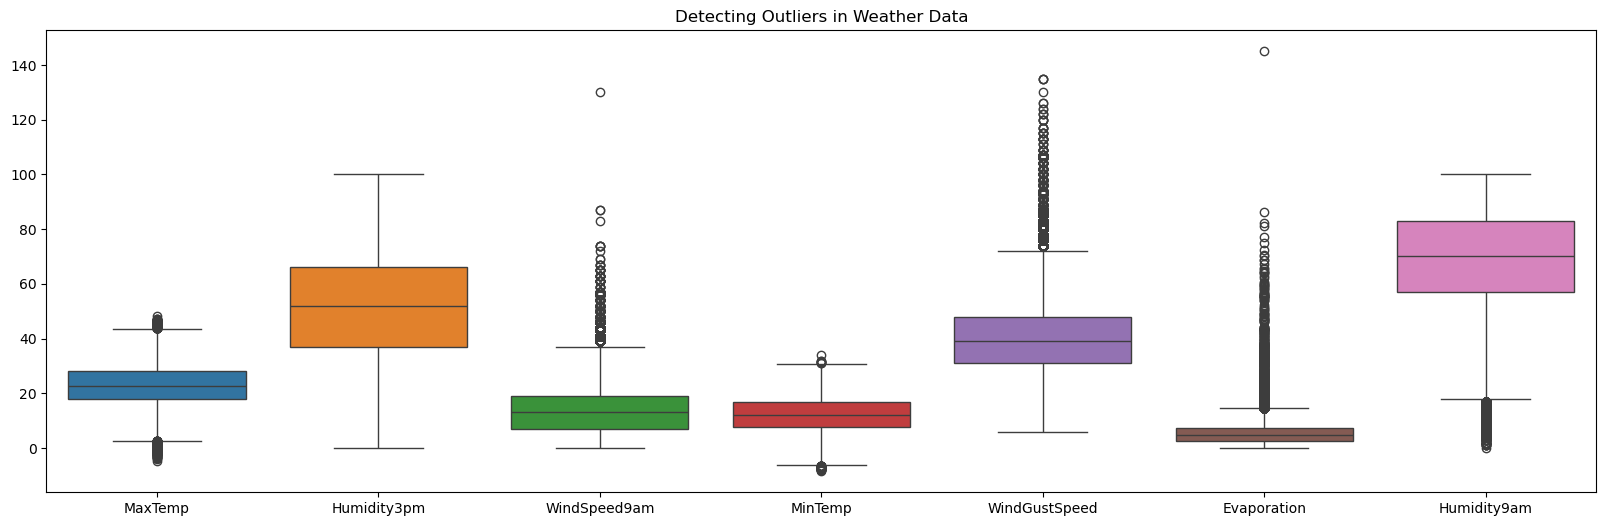

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.boxplot(data=df[["MaxTemp", "Humidity3pm", "WindSpeed9am","MinTemp","WindGustSpeed","Evaporation","Humidity9am"]]) 
plt.title("Detecting Outliers in Weather Data")
plt.show()


In [221]:
df_numeric = df.select_dtypes(include=[int,float])  # Keeps only numeric columns

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Identify outliers (row-wise mask)
outlier_mask = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR)))

# Replace outliers with column median
for col in df_numeric.columns:
    df.loc[outlier_mask[col], col] = df_numeric[col].median()

print(f"Total outliers detected: {outlier_mask.sum().sum()}")


Total outliers detected: 40109


In [222]:
df.shape

(145460, 23)

In [223]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [224]:
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  


In [225]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [226]:
df["RainToday"] = df["RainToday"].map({"No": 0, "Yes": 1})
df["RainTomorrow"] = df["RainTomorrow"].map({"No": 0, "Yes": 1})

In [227]:
df = pd.get_dummies(df, columns=["WindGustDir", "WindDir9am", "WindDir3pm"], drop_first=True)

In [228]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [229]:
X = df.drop(columns=["RainTomorrow","Date","Location"])  # Features
y = df["RainTomorrow"]  # Target variable


In [230]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [231]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [232]:
y_pred = model.predict(X_test)


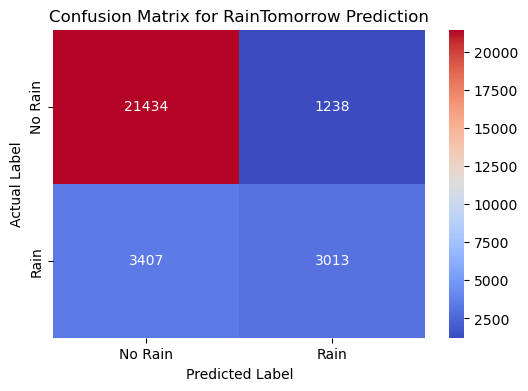

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for RainTomorrow Prediction")
plt.show()


In [252]:
#Accuracy from confusion matrix
TP= cm[1,1] #True positive
TN= cm[0,0] #True negative
Total=len(y_test)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

Accuracy from confusion matrix is  0.8403341124707824


In [253]:
# Precision = TP / (TP + FP)
TP = cm[1, 1]  # True Positives
FP = cm[0, 1]  # False Positives

precision = TP / (TP + FP)
print("Precision from confusion matrix is", precision)


Precision from confusion matrix is 0.7087744060221124


In [254]:
# Recall = TP / (TP + FN)
FN = cm[1, 0]  # False Negatives

recall = TP / (TP + FN)
print("Recall from confusion matrix is", recall)


Recall from confusion matrix is 0.4693146417445483


In [255]:
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1 Score from confusion matrix is", f1_score)


F1 Score from confusion matrix is 0.5647080873395182


In [235]:
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(comparison_df.head(10))


        Actual  Predicted
100721       1          1
30234        0          0
68427        0          0
28624        0          0
31173        0          0
573          0          0
120056       0          0
43057        1          1
28966        0          0
90691        1          1


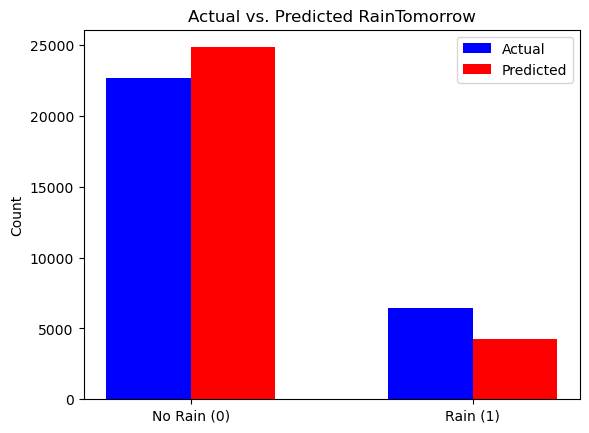

In [236]:
# Group the actual vs. predicted values
labels = ["No Rain (0)", "Rain (1)"]
actual_counts = [sum(y_test == 0), sum(y_test == 1)]
predicted_counts = [sum(y_pred == 0), sum(y_pred == 1)]

# Bar width
width = 0.3
x = np.arange(len(labels))

# Create the bar chart
plt.bar(x - width/2, actual_counts, width, label="Actual", color="blue")
plt.bar(x + width/2, predicted_counts, width, label="Predicted", color="red")

# Labels and title
plt.xticks(x, labels)
plt.ylabel("Count")
plt.title("Actual vs. Predicted RainTomorrow")
plt.legend()
plt.show()


## How often does it rain tomorrow?

C:\Users\hp\AppData\Local\Temp\ipykernel_3560\1105556027.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["RainTomorrow"], palette="coolwarm")


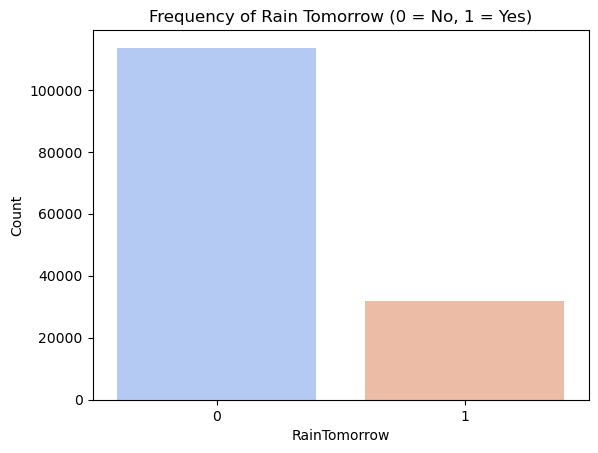

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["RainTomorrow"], palette="coolwarm")
plt.title("Frequency of Rain Tomorrow (0 = No, 1 = Yes)")
plt.xlabel("RainTomorrow")
plt.ylabel("Count")
plt.show()


## Which features correlate most with rain tomorrow?

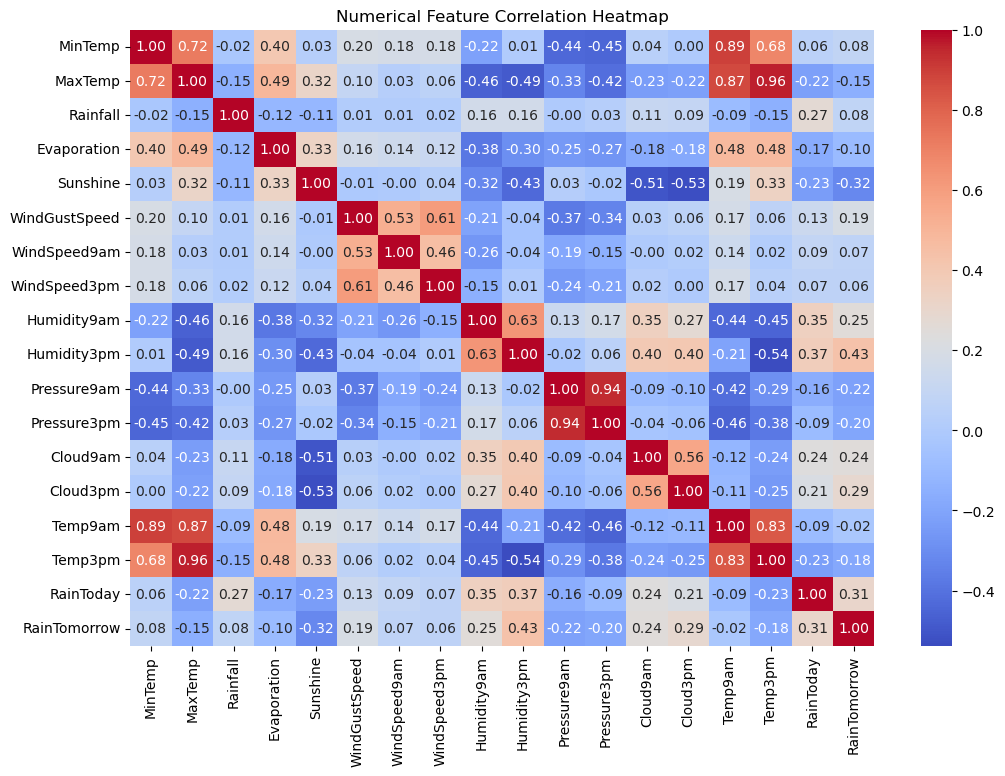

In [238]:
numeric_df = df.select_dtypes(include=["float64", "int64"])  # Filter out categorical columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Numerical Feature Correlation Heatmap")
plt.show()
